<a href="https://colab.research.google.com/github/PhoenixAlpha23/KAN/blob/main/YOLOv11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ccqJXTJFnxpqAzpQOSFj")
project = rf.workspace("major-a0zsb").project("documents-dataset-yygxz")
version = project.version(3)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Documents-Dataset-3 in yolov11:: 100%|██████████| 13944/13944 [00:09<00:00, 1520.44it/s]


In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.1/107.7 GB disk)


In [4]:
!yolo task=detect mode=predict model=yolo11n.pt conf=0.25 source='/content/Documents-Dataset-3/test/images/00b931d3-a804-41c8-8568-1dcb00e81739-6_jpg.rf.3e69d254b80ff42b5f91a4804d298505.jpg' save=True

100% 5.35M/5.35M [00:00<00:00, 219MB/s]
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /content/Documents-Dataset-3/test/images/00b931d3-a804-41c8-8568-1dcb00e81739-6_jpg.rf.3e69d254b80ff42b5f91a4804d298505.jpg: 640x480 1 book, 170.6ms
Speed: 4.7ms preprocess, 170.6ms inference, 27.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


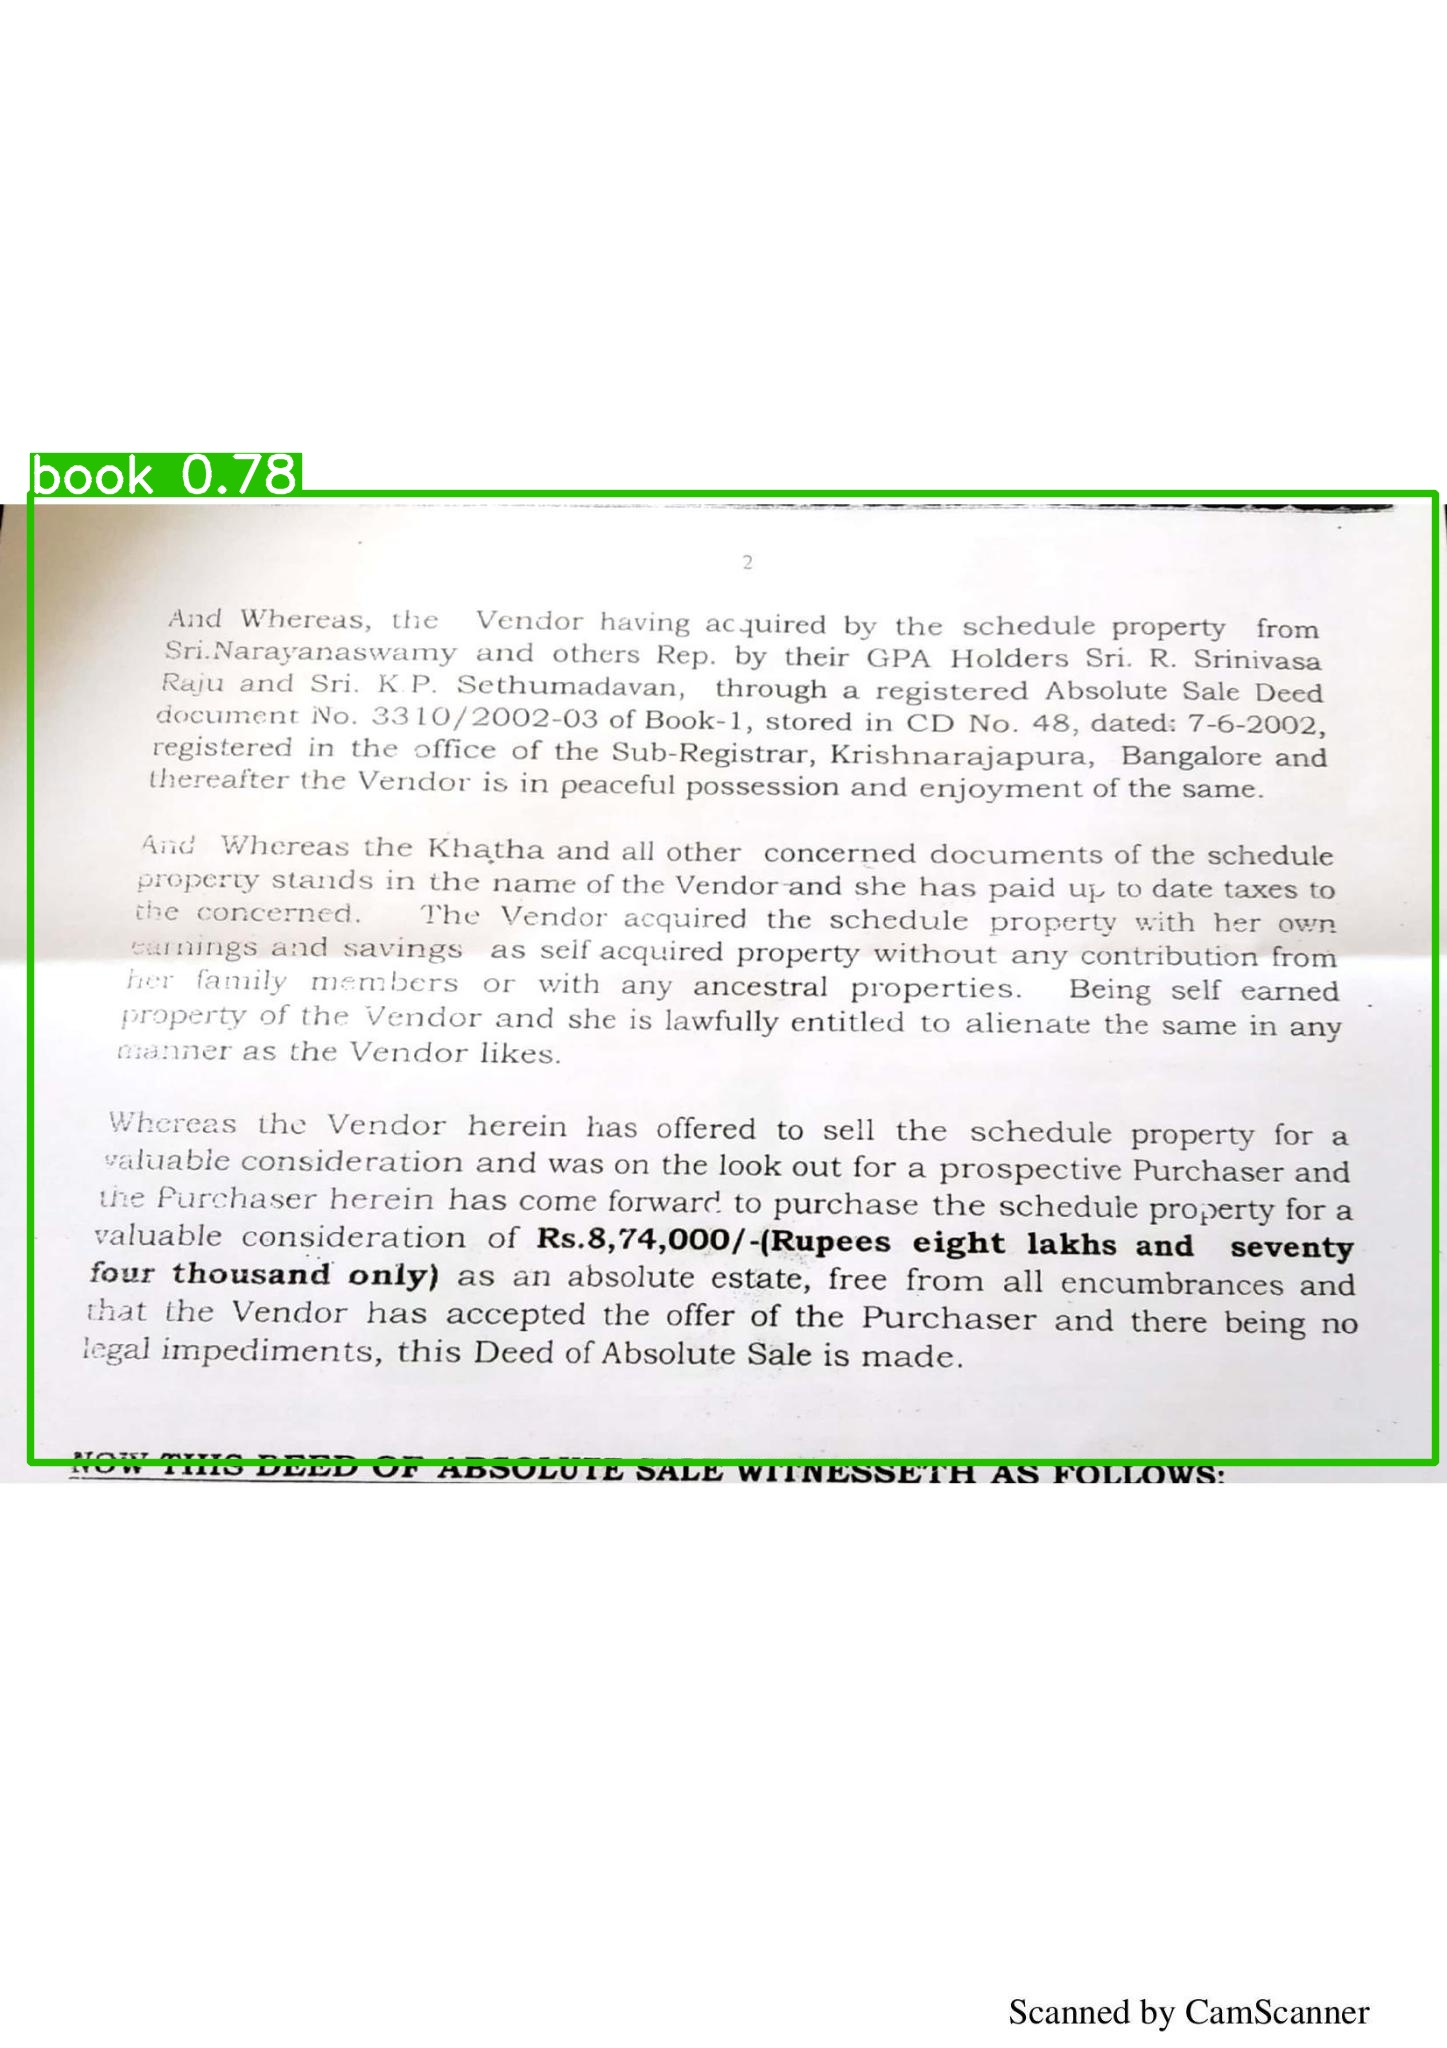

In [6]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/predict/00b931d3-a804-41c8-8568-1dcb00e81739-6_jpg.rf.3e69d254b80ff42b5f91a4804d298505.jpg', width=600)

In [9]:
from ultralytics import YOLO
from PIL import Image
import requests

model = YOLO('yolo11n.pt')
image = Image.open('/content/Documents-Dataset-3/test/images/00b931d3-a804-41c8-8568-1dcb00e81739-6_jpg.rf.3e69d254b80ff42b5f91a4804d298505.jpg')
result = model.predict(image, conf=0.25)[0]


0: 640x480 1 book, 162.1ms
Speed: 6.2ms preprocess, 162.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)


In [10]:
result.boxes.xyxy

tensor([[  30.1239,  493.4229, 1435.2502, 1462.8705]])

In [12]:
result.boxes.conf

tensor([0.7817])

In [13]:
import supervision as sv

detections = sv.Detections.from_ultralytics(result)

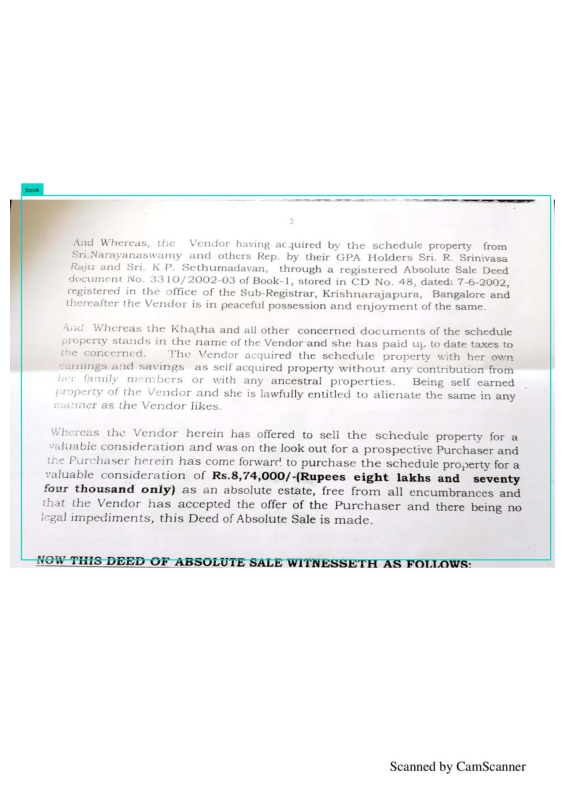

In [14]:
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)

annotated_image = image.copy()
annotated_image = box_annotator.annotate(annotated_image, detections=detections)
annotated_image = label_annotator.annotate(annotated_image, detections=detections)

sv.plot_image(annotated_image, size=(10, 10))